# Problem Set 6

## Read data

In [1]:
import numpy as np
import matplotlib
import pylab as plt
import pickle
from sklearn.neural_network import MLPRegressor

data_dir = "/data/jdli/gaia/"
tr_file  = "ap17_xpcont_train.pickle"
val_file = "ap17_xpcont_validation.pickle"


with open(tr_file, 'rb') as f1:
    data_tr = pickle.load(f1)

with open(val_file, 'rb') as f2:
    data_val = pickle.load(f2)
    
    
print("Keys of training set and validation set are:")
print(data_tr.keys(), "\n", data_val.keys())

print("array shape of traing set and validation set are:")
print([data_tr[_].shape for _ in data_tr.keys()], "\n", [data_val[_].shape for _ in data_val.keys()])

Keys of training set and validation set are:
dict_keys(['bp_coef', 'rp_coef', 'labels']) 
 dict_keys(['bp_coef', 'rp_coef', 'labels'])
array shape of traing set and validation set are:
[(4000, 55), (4000, 55), (4000, 2)] 
 [(1000, 55), (1000, 55), (1000, 2)]


### note: labels are n*2, the first column is TEFF, the second is Log g.

In [2]:
bp_tr, rp_tr = data_tr['bp_coef'], data_tr['rp_coef']

teff_tr = data_tr['labels'][:,0]

bp_val, rp_val = data_val['bp_coef'], data_val['rp_coef']

teff_val = data_val['labels'][:,0]

## BP+RP, normalized, linear (from PS5)

In [3]:
def designfit(design,labels):
    return (np.linalg.solve(np.matmul(design.transpose(),design),np.matmul(design.transpose(),labels)))

In [4]:
rpANDbp_tr = np.concatenate((rp_tr,bp_tr),axis=1)
rpANDbp_tr = np.array([row/row[0] for row in rpANDbp_tr])
rpANDbp_val = np.concatenate((rp_val,bp_val),axis=1)
rpANDbp_val = np.array([row/row[0] for row in rpANDbp_val])

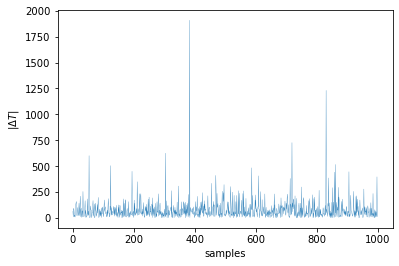

Mean absolute deviation is delta_T = 76.3782765791043.


In [5]:
pars = designfit(rpANDbp_tr,teff_tr)
plt.plot(abs(np.matmul(rpANDbp_val,pars)-teff_val),linewidth=0.3)
plt.xlabel('samples')
plt.ylabel('$|\Delta T|$')
plt.show()
print(f'Mean absolute deviation is delta_T = {np.mean(abs(np.matmul(rpANDbp_val,pars)-teff_val))}.')

## Problem 2 (Neural network regression)

In [61]:
regr = MLPRegressor(hidden_layer_sizes=1000, max_iter=1000, solver='lbfgs').fit(rpANDbp_tr, teff_tr)

/Users/krlodeleon/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


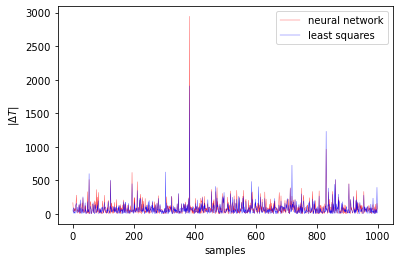

[neural netwrk] Mean absolute deviation is delta_T = 84.65164600269645.
[least squares] Mean absolute deviation is delta_T = 76.3782765791043.


In [62]:
predicted = regr.predict(rpANDbp_val)

plt.plot(abs(predicted-teff_val), linewidth=0.3, color='red', label='neural network')
plt.plot(abs(np.matmul(rpANDbp_val,pars)-teff_val),linewidth=0.3, color='blue', label='least squares')
plt.xlabel('samples')
plt.ylabel('$|\Delta T|$')
plt.legend()
plt.show()
print(f'[neural netwrk] Mean absolute deviation is delta_T = {np.mean(abs(predicted-teff_val))}.')
print(f'[least squares] Mean absolute deviation is delta_T = {np.mean(abs(np.matmul(rpANDbp_val,pars)-teff_val))}.')